# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [3]:
import numpy as np
import math
# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject
#Importing HouseholdSpecializationModelClass
from HouseholdSpecializationModel import HouseholdSpecializationModelClass


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

**Explain how you solve the model**

[0.25, 0.5, 0.75] [0.5, 1, 1.5] 0.5 1.0


c:\Users\ladyk\projects-2023-kernen-af-kulten-3\inauguralproject\HouseholdSpecializationModel.py:66: RuntimeWarning: divide by zero encountered in reciprocal
  H=((1-par.alpha)*HM**((par.sigma-1)/par.sigma) + par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


       0.5   1.0   1.5
0.25  0.545 0.308 0.214
0.50  1.000 1.000 1.000
0.75  1.833 3.250 4.667
0.75 1.5


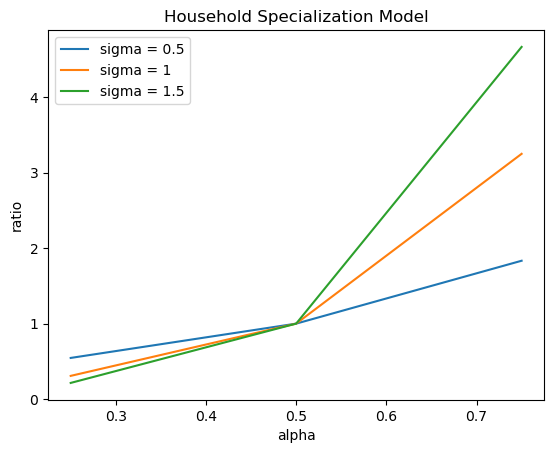

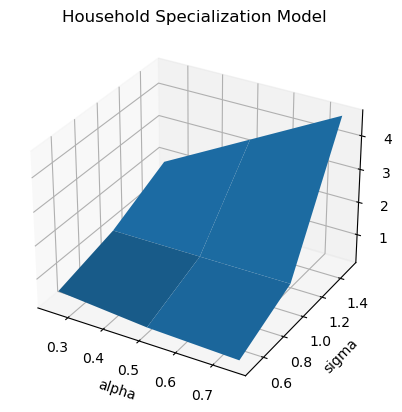

0.5 1


In [4]:
# V2 af løsningen til spg 1
hm = HouseholdSpecializationModelClass() #gives HouseholdSpecializationModelClass a shorter name to call
#Creates vectors for the three cases for each variable:
alpha_vec=[0.25, 0.5, 0.75]
sigma_vec=[0.5, 1, 1.5]
#checks that the vectors are correct and shows the original values
print(alpha_vec, sigma_vec, hm.par.alpha, hm.par.sigma)

#TABEL LØSNING
#Creates a table with the result:
def print_table(alpha_vec,sigma_vec):
    
    # a. empty text
    text = ''
    
    # b. top header (the sigma-values)
    text += f'{"":1s}{"":3s}{sigma_vec[0]:6.1f}{"":3s}{sigma_vec[1]:1.1f}{"":3s}{sigma_vec[2]:1.1f}\n'

    
    # c. body
    # Creates a loop over the values in the two vectors, where it calculates the HF/HM ratio for each of the 9 combinations of the values in the vectors
    for i,alpha in enumerate(alpha_vec):
        if i > 0:
            text += '\n' # line shift
        text += f'{alpha:1.2f} ' # left header (alpha values)
        for j, sigma in enumerate(sigma_vec):
            hm.par.alpha=alpha
            hm.par.sigma=sigma
            text += f'{hm.solve_discrete().ratio :6.3f}'
    
    # d. prints the table
    print(text) 
print_table(alpha_vec,sigma_vec)

print(hm.par.alpha, hm.par.sigma) #sees that the values has changed to 0.75 and 1.5, so resets at the bottom of the code

#KLASSISK GRAF-LØSNING
def get_data(alpha_vec, sigma_vec):
    data = []
    for i, alpha in enumerate(alpha_vec):
        row = [alpha]
        for j, sigma in enumerate(sigma_vec):
            hm.par.alpha = alpha
            hm.par.sigma = sigma
            ratio = hm.solve_discrete().ratio
            row.append(ratio)
        data.append(tuple(row))
    return data

import matplotlib.pyplot as plt

data = get_data(alpha_vec, sigma_vec)

plt.figure()
for i, sigma in enumerate(sigma_vec):
    x = [row[0] for row in data]
    y = [row[i+1] for row in data]
    plt.plot(x, y, label=f'sigma = {sigma}')

plt.xlabel('alpha')
plt.ylabel('ratio')
plt.title('Household Specialization Model')
plt.legend()
plt.show()

#3D GRAF LØSNING
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


data = []
for i, alpha in enumerate(alpha_vec):
    row = []
    for j, sigma in enumerate(sigma_vec):
        hm.par.alpha = alpha
        hm.par.sigma = sigma
        ratio = hm.solve_discrete().ratio
        row.append(ratio)
    data.append(row)

alpha_grid, sigma_grid = np.meshgrid(alpha_vec, sigma_vec)
ratio_grid = np.array(data)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(alpha_grid, sigma_grid, ratio_grid)
ax.set_xlabel('alpha')
ax.set_ylabel('sigma')
ax.set_zlabel('ratio')
ax.set_title('Household Specialization Model')
plt.show()

#Resets alpha and sigma values
hm.par.alpha=0.5
hm.par.sigma=1
print(hm.par.alpha, hm.par.sigma)


alpha sigma ratio


c:\Users\ladyk\projects-2023-kernen-af-kulten-3\inauguralproject\HouseholdSpecializationModel.py:62: RuntimeWarning: divide by zero encountered in reciprocal
  H=((1-par.alpha)*HM**((par.sigma-1)/par.sigma) + par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


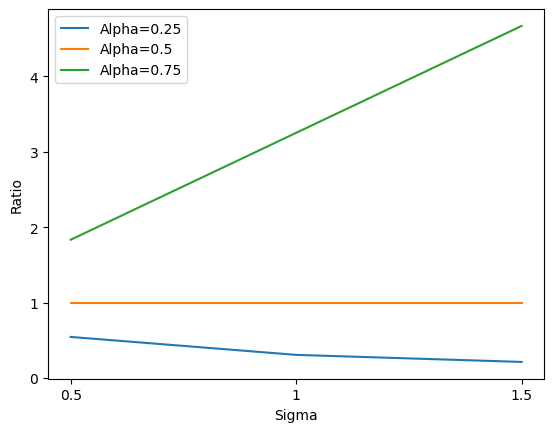

[0.5454545454545454, 0.3076923076923077, 0.21428571428571427, 1.0, 1.0, 1.0, 1.8333333333333333, 3.25, 4.666666666666667]


In [14]:
# code for solving the model (remember documentation and comments)
hm = HouseholdSpecializationModelClass() #gives HouseholdSpecializationModelClass a shorter name to call

#Importing the necessary tools
import matplotlib.pyplot as plt
import ipywidgets as widgets
from array import *
# a. calculations
alphavalues = [0.25,0.5,0.75] #creating an array of the needed values for alpha
sigmavalues = [0.5,1,1.5] #creating an array of the needed values for sigma
alphaoutput= []
sigmaoutput= []
ratiooutput = []
print("alpha", "sigma", "ratio")

#creating a loop that crosses each value of alpha and sigma and calculates the ratio for each of the 9 options and appends these
for a in alphavalues:
    for s in sigmavalues:
        hm.par.alpha = a
        alphaoutput.append(a)
        hm.par.sigma = s
        sigmaoutput.append(s)
        ratiooutput.append(hm.solve_discrete().ratio)
        


#b. Creating plot
#makes the plot for the first three values of the ratiooutput array which is the ones where alpha is 0.25 and sigma is the three different values
plt.plot(ratiooutput[:3],label="Alpha=0.25") 
#makes the plot for the next three values of the ratiooutput array which is the ones where alpha is 0.5 and sigma is the three different values
plt.plot(ratiooutput[3:6],label="Alpha=0.5")
#makes the plot for the last three values of the ratiooutput array which is the ones where alpha is 0.75 and sigma is the three different values
plt.plot(ratiooutput[6:9],label="Alpha=0.75")
plt.legend()
plt.ylabel("Ratio")
plt.xticks([0,1,2],[0.5,1,1.5])
plt.xlabel("Sigma")
#Makes the plot appear
plt.show()
print(ratiooutput) #prints the ratiooutput values

# Question 2

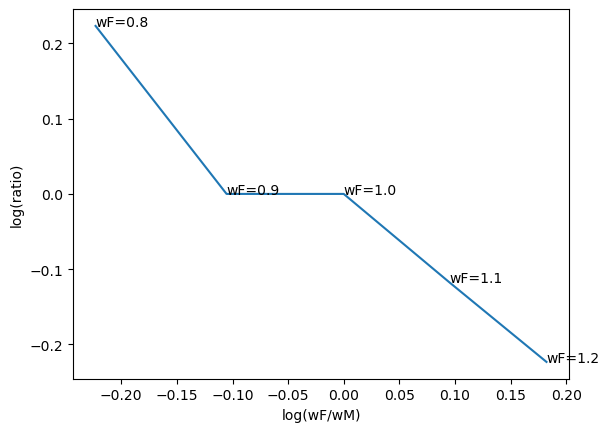

In [5]:
#V2 AF SPG 2
import math
import matplotlib.pyplot as plt
#resets parameters
hm.par.alpha=0.5
hm.par.sigma=1
hm.par.wF=1

#Creates the vector for the needed wagevalues
wF_vector = [0.8, 0.9, 1.0, 1.1, 1.2]
#Creates two empty vectors to be used for the graph
x_data = []
y_data = []

# Calculates the log(ratio) and log wage ratio for each of the wF values and saves the results in the x and y vectors
for j, wage in enumerate(wF_vector):
    hm.par.wF = wage
    logwratio = math.log(hm.par.wF/hm.par.wM)
    logratio = math.log(hm.solve_discrete().ratio)
    x_data.append(logwratio)
    y_data.append(logratio)

# creates plot
plt.plot(x_data, y_data)
plt.xlabel('log(wF/wM)')
plt.ylabel('log(ratio)')

# add wF values as labels for each of the datapoints
for i in range(len(wF_vector)):
    plt.text(x_data[i], y_data[i], f"wF={wF_vector[i]}")

# Shows the graph
plt.show()



Explain your code and procedure

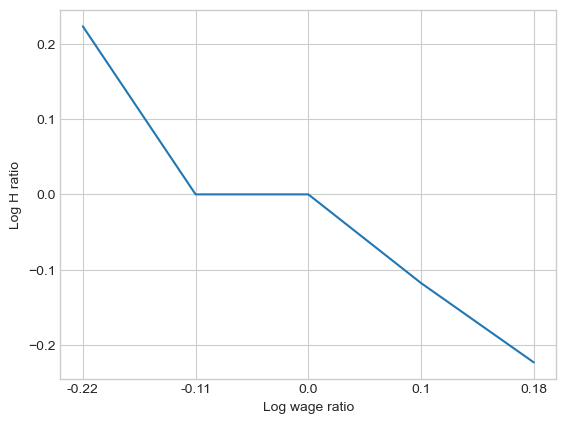

[0.22314355131420976, 0.0, 0.0, -0.11778303565638351, -0.2231435513142097]


In [108]:
wageratio = [0.8, 0.9, 1.0, 1.1, 1.2] #creates an array with the necessary wagerations
lwageratio = wageratio
loutput = []
counter = 0
for wage in wageratio:
    lwageratio[counter] = round(math.log(wage),2)
    counter = counter+1
    hm.par.wF = wage
    loutput.append(math.log(hm.solve_discrete().ratio))


plt.plot(loutput)
plt.ylabel("Log H ratio")
plt.xticks([0,1,2,3,4],lwageratio)
plt.xlabel("Log wage ratio")

plt.show()
print(loutput)
    
hm.par.wF=1

# Question 3

4.5 4.5 4.5 4.5


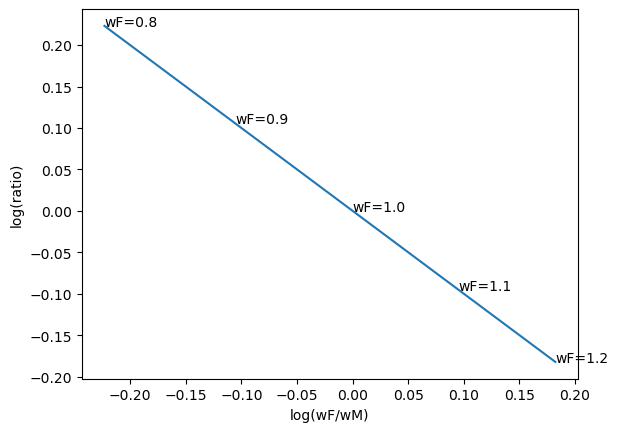

In [7]:
#resets parameters
hm.par.alpha=0.5
hm.par.sigma=1
hm.par.wF=1

#Calculating the optimal variables in the discrete function to find a good initial guess
print(hm.solve_discrete().HF, hm.solve_discrete().HM, hm.solve_discrete().LF, hm.solve_discrete().LM)

#Creates the vector for the needed wagevalues
wF_vector = [0.8, 0.9, 1.0, 1.1, 1.2]
#Creates two empty vectors to be used for the graph
x_data = []
y_data = []

# Calculates the log(ratio) and log wage ratio for each of the wF values and saves the results in the x and y vectors
for j, wage in enumerate(wF_vector):
    hm.par.wF = wage
    logwratio = math.log(hm.par.wF/hm.par.wM)
    logratio = math.log(hm.solve().ratio)
    x_data.append(logwratio)
    y_data.append(logratio)

# creates plot
plt.plot(x_data, y_data)
plt.xlabel('log(wF/wM)')
plt.ylabel('log(ratio)')

# add wF values as labels for each of the datapoints
for i in range(len(wF_vector)):
    plt.text(x_data[i], y_data[i], f"wF={wF_vector[i]}")

# Shows the graph
plt.show()


# Question 4

In [11]:
#resets parameters
hm.par.alpha=0.5
hm.par.sigma=1
hm.par.wF=1

hm.estimate()


Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimal alpha: 0.9819855180239534
Optimal sigma: 0.10003901171748744


ADD CONCISE CONLUSION.